Construcción de modelos usando estimadores
===

* *30 min* | Última modificación: Julio 12, 2019.

## Depedencias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf
## Establece el nivel de reporte en 
## pantalla de TensorFlow
tf.logging.set_verbosity(tf.logging.ERROR)

## Dataset

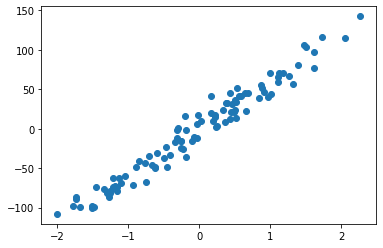

In [3]:
##
## datos del problema propuesto
##
from sklearn.datasets import make_regression

X, d = make_regression(
    n_samples=100,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=12.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion
    random_state=12136)    #

plt.scatter(X, d);

## Featured Columns

Para columnas categoricas cuyos valores conocidos:

```python
eye_color = tf.feature_column.categorical_column_with_vocabulary_list(
    "eye_color", 
    vocabulary_list=["blue", 
                     "brown", 
                     "green"])
```

Para columnas categoricas para las que no se conocen todos los valores posibles:

```python
education = tf.feature_column.categorical_column_with_hash_bucket(
    "education", 
    hash_bucket_size=1000)
```

Para combinaciones:

```python
sport_x_city = tf.feature_column.crossed_column(
    ["sport", "city"], 
    hash_bucket_size=int(1e4))
```

Bucketization:

```python
age_buckets = tf.feature_column.bucketized_column(
    age, 
    boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
```

In [ ]:
## Indica que la columna 'x' es numérica
column = tf.feature_column.numeric_column("x")

## Funciones de entrada a los estimadores

In [4]:
## Función de entrada para el estimador.
## Debe retornar una tupla con (entradas, salida).
## Note que features es un diccionario que contine 
## una paraja clave-valor por cada variable 
## independiente
def input_fn_train():
    features={'x': np.array(X)}
    labels=d
    return features, labels


## Esta función es igual que la anterior, pero 
## retorna únicamente el data.frame de variables
## independientes
def input_fn_predict():
    features = {'x': X}
    return features

## Baseline regressor

Pronosticos:
  -0.0755   -2.9318
   0.2546   -2.9318
  -1.6779   -2.9318
   0.0293   -2.9318
  -1.2602   -2.9318
  -1.1800   -2.9318
   1.2612   -2.9318
  -0.4497   -2.9318
   0.4412   -2.9318
   0.3960   -2.9318
  -0.0354   -2.9318
   2.2734   -2.9318
   0.5158   -2.9318
   1.6237   -2.9318
   0.1691   -2.9318
  -0.0121   -2.9318
  -0.3039   -2.9318
  -1.1597   -2.9318
   0.2303   -2.9318
  -1.2708   -2.9318
  -1.5080   -2.9318
  -0.9356   -2.9318
  -1.4532   -2.9318
   0.5876   -2.9318
   0.4854   -2.9318
   0.8495   -2.9318
   1.1130   -2.9318
  -1.7399   -2.9318
  -0.2514   -2.9318
  -1.0507   -2.9318
  -0.3076   -2.9318
   0.3728   -2.9318
   0.5264   -2.9318
  -1.3370   -2.9318
  -0.6606   -2.9318
  -0.6144   -2.9318
  -1.4774   -2.9318
   1.1807   -2.9318
   0.9704   -2.9318
  -1.5066   -2.9318
   0.8731   -2.9318
  -0.0937   -2.9318
  -0.1800   -2.9318
   2.0581   -2.9318
  -0.7563   -2.9318
   0.8886   -2.9318
   0.1899   -2.9318
  -0.3355   -2.9318
   0.2248   -2.9318
   0.44

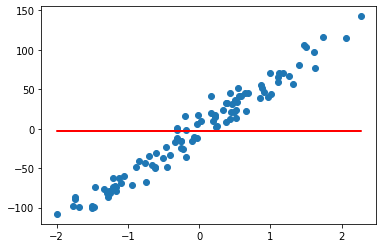

In [5]:
## Construye el estimador base, cuya salida es
## una constante.
regressor = tf.estimator.BaselineRegressor()

## Entrenamiento
regressor.train(
    input_fn=input_fn_train,  # función de entrada
    steps=100)                # número de iteraciones (optimización)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results = regressor.predict(
    input_fn=input_fn_predict)

## Imprime los resultados.
forecasts = []
print('Pronosticos:')
for i, value in zip(X, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i[0], value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plt.plot(X, d, 'o')

## Grafica los pronósticos del modelo
plt.plot(X, forecasts, '-', color = 'red');

## Imprime los estadísticos de error.
metrics = regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')

## Linear Regressor

Pronosticos:
  -0.0755   -4.7529
   0.2546   13.6133
  -1.6779   -93.9188
   0.0293    1.0802
  -1.2602   -70.6734
  -1.1800   -66.2129
   1.2612   69.6243
  -0.4497   -25.5779
   0.4412   23.9954
   0.3960   21.4808
  -0.0354   -2.5228
   2.2734   125.9521
   0.5158   28.1498
   1.6237   89.7950
   0.1691    8.8578
  -0.0121   -1.2281
  -0.3039   -17.4645
  -1.1597   -65.0860
   0.2303   12.2623
  -1.2708   -71.2660
  -1.5080   -84.4643
  -0.9356   -52.6139
  -1.4532   -81.4174
   0.5876   32.1452
   0.4854   26.4580
   0.8495   46.7200
   1.1130   61.3792
  -1.7399   -97.3663
  -0.2514   -14.5440
  -1.0507   -59.0169
  -0.3076   -17.6706
   0.3728   20.1897
   0.5264   28.7391
  -1.3370   -74.9489
  -0.6606   -37.3105
  -0.6144   -34.7427
  -1.4774   -82.7617
   1.1807   65.1464
   0.9704   53.4446
  -1.5066   -84.3889
   0.8731   48.0329
  -0.0937   -5.7676
  -0.1800   -10.5700
   2.0581   113.9702
  -0.7563   -42.6350
   0.8886   48.8909
   0.1899   10.0148
  -0.3355   -19.2237
   

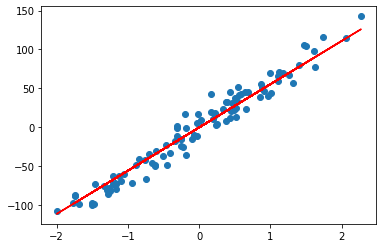

In [6]:
## Construye el estimador lineal, cuya salida es
## el resultado de la regresión lineal entre
## x y y.
regressor = tf.estimator.LinearRegressor(
    feature_columns = [column],
    optimizer = tf.train.AdamOptimizer(
        learning_rate = 0.2))

## Entrenamiento
regressor.train(
    input_fn=input_fn_train,
    steps=500)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results = regressor.predict(
    input_fn=input_fn_predict)

## Imprime los resultados.
forecasts = []
print('Pronosticos:')
for i, value in zip(X, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i[0], value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plt.plot(X, d, 'o')

## Grafica los pronósticos del modelo
plt.plot(X, forecasts, '-', color = 'red');

## Imprime los estadísticos de error.
metrics = regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')